In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
def wrangle_cc():
    '''
    This function reads in card_transdata data from Kaggle, writes data to
    a csv file if a local file does not exist, and returns a df
    '''
    filename = 'card_transdata.csv'
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        
    return df

In [3]:
df = wrangle_cc()
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
def overview(df):
    '''
    print shape of DataFrame, .info, and .describe
    parameters: single pandas dataframe, df
    return: none
    '''
    print('--- Shape: {}'.format(df.shape))
    print('____________________________________________________')
    print('--- Info')
    df.info()
    print('____________________________________________________')
    print('--- Column Descriptions')
    print()
    print(df.describe())

In [5]:
overview(df)

--- Shape: (1000000, 8)
____________________________________________________
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
____________________________________________________
--- Column Descriptions

       distance_from_home  distance_from_last_transact

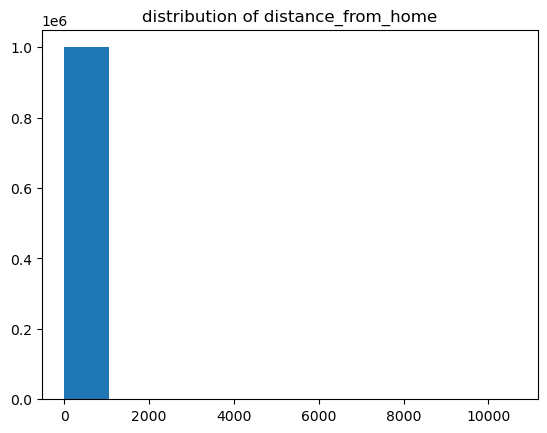

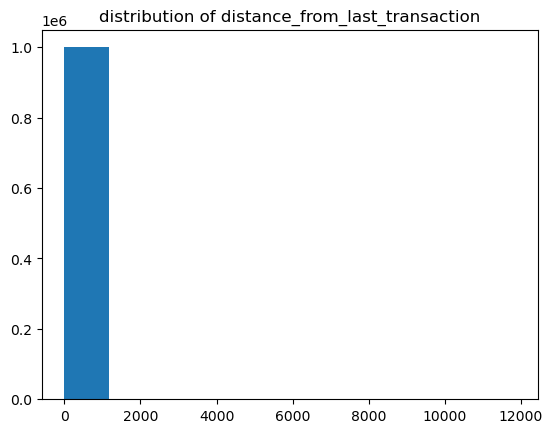

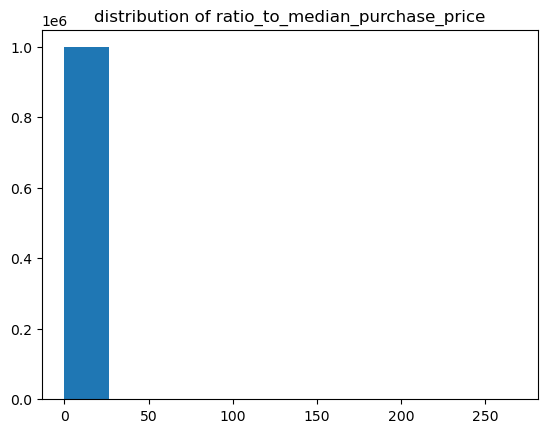

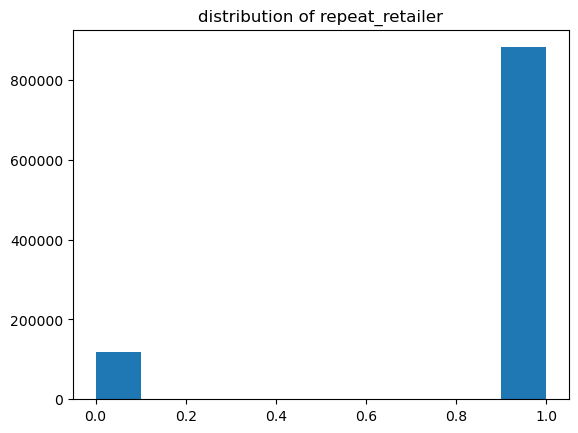

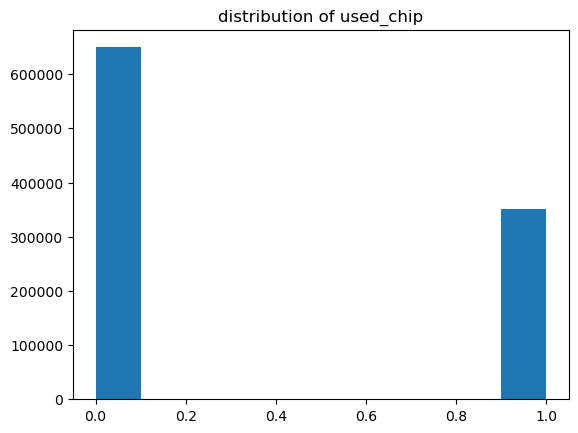

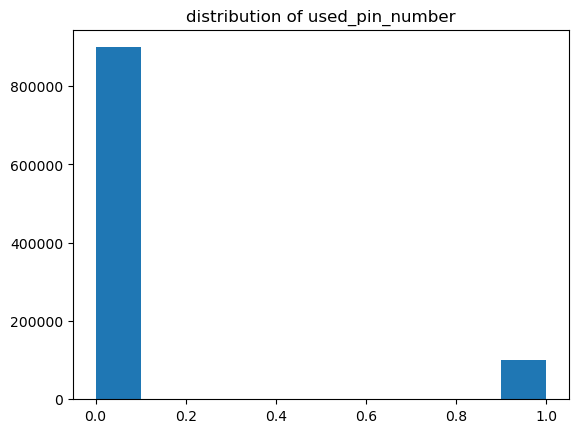

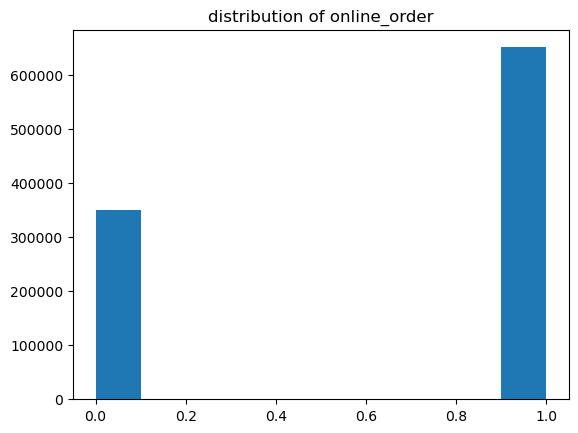

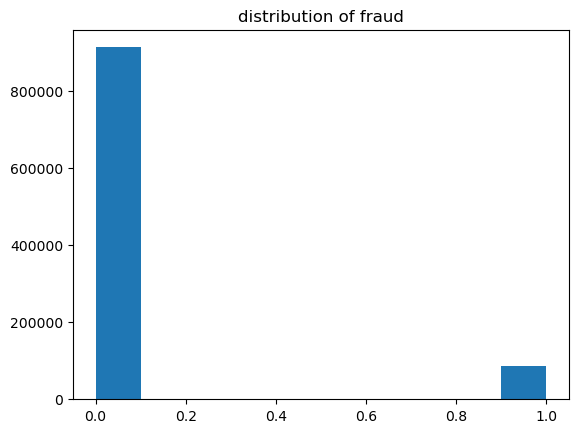

In [6]:
for col in df:
    
    plt.hist(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [7]:
df.distance_from_home.value_counts().max()

1

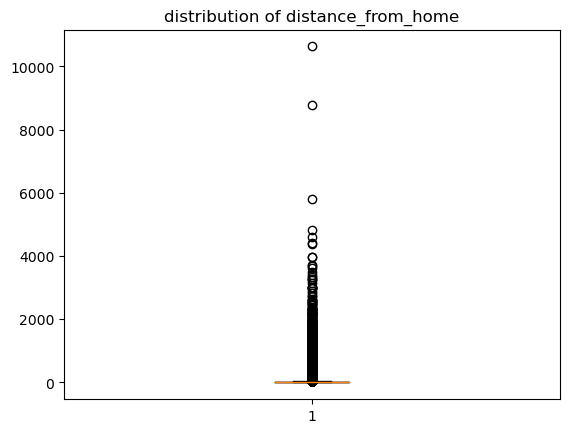

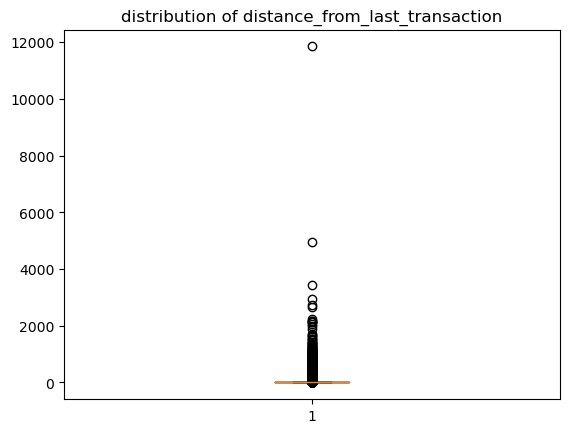

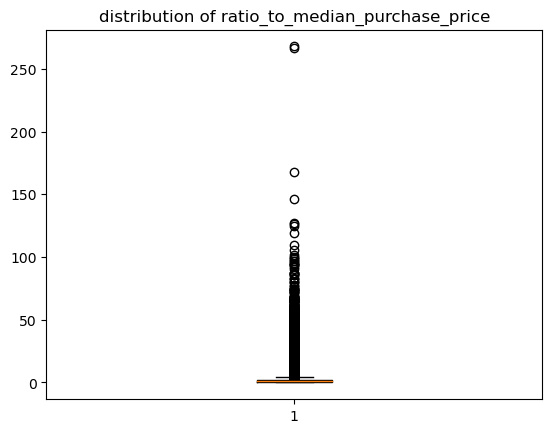

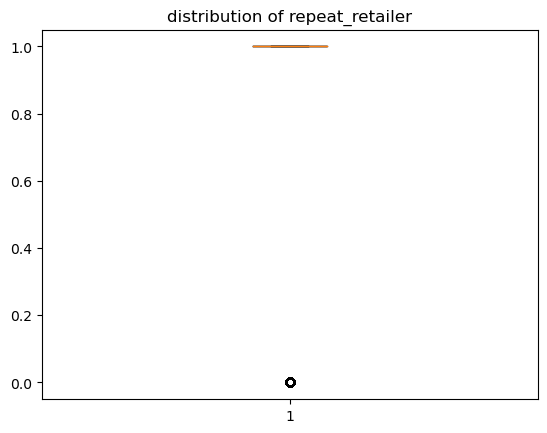

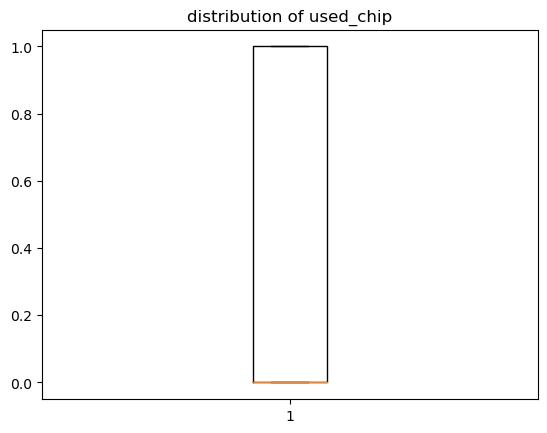

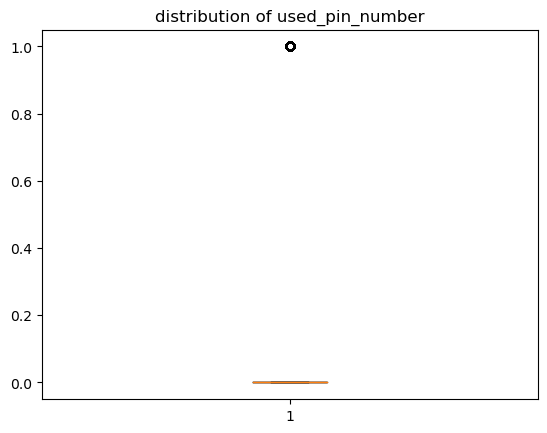

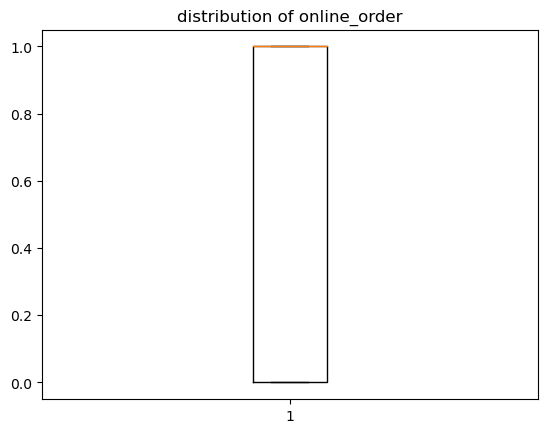

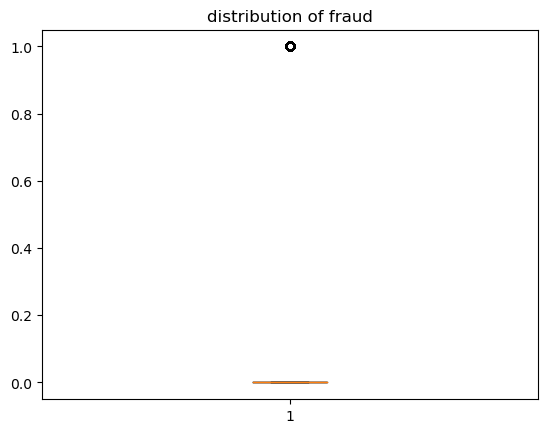

In [8]:
num_cols = list(df.select_dtypes(exclude=object).columns.values)

for col in num_cols:
    
    plt.boxplot(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [9]:
def prep_cc(df):
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        k=1.5
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        df = df[(wines[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [10]:
def split_data(df, target):
    '''
    This function take in a dataframe performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test
    and prints out the shape of train, validate, test
    '''
    
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    #Split into X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [11]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_data(df, 
                                                                                  'fraud')

train -> (560000, 8)
validate -> (240000, 8)
test -> (200000, 8)


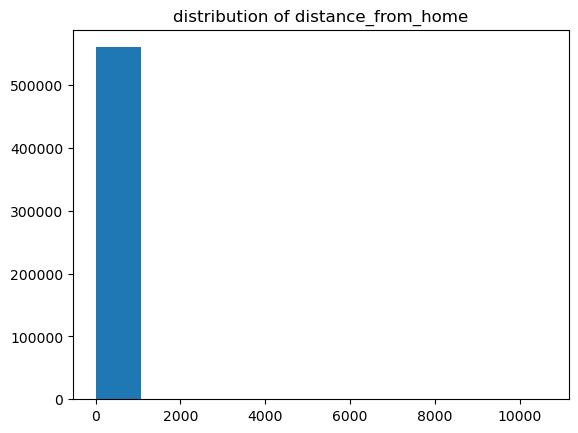

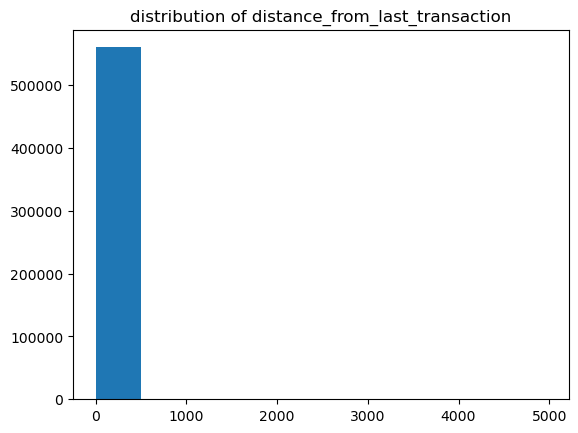

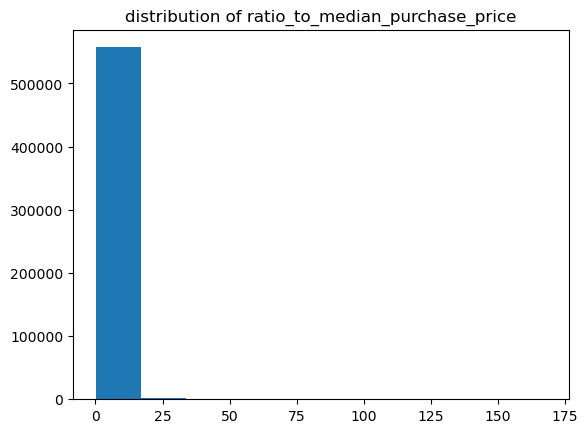

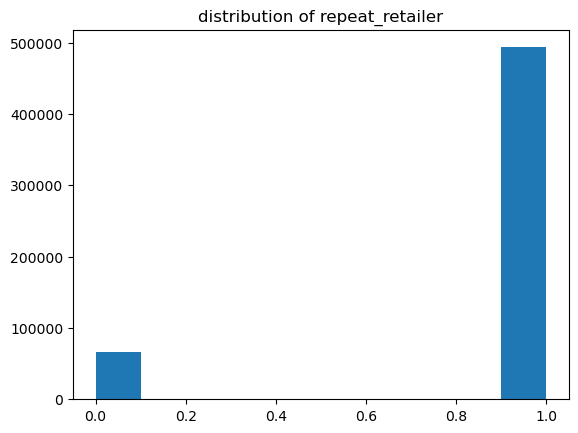

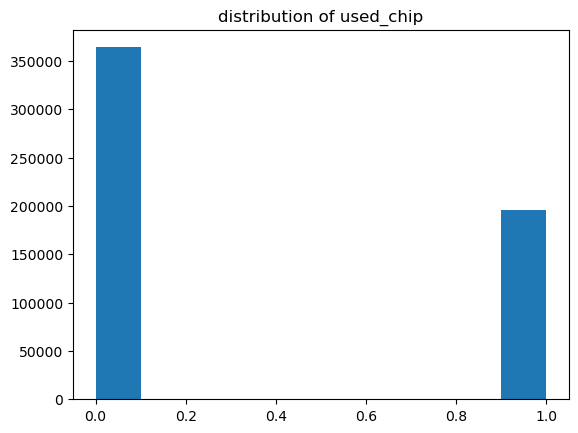

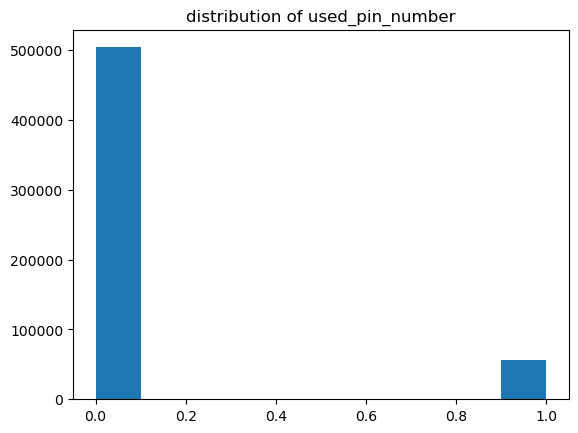

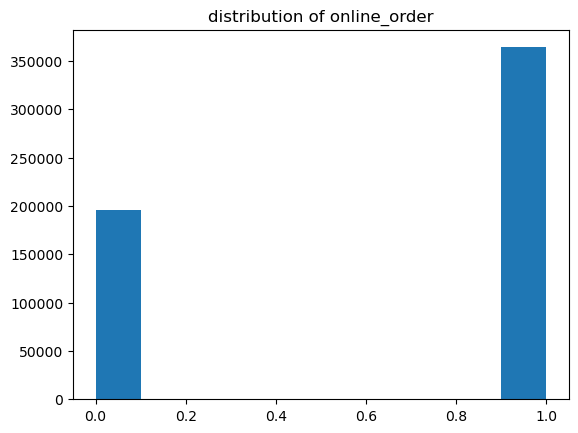

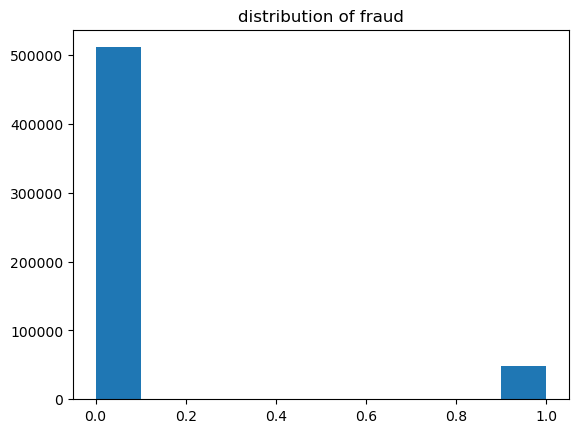

In [12]:
num_cols = list(train.select_dtypes(exclude=object).columns.values)

for col in num_cols:
    
    plt.hist(train[col])
    plt.title(f'distribution of {col}')
    plt.show()

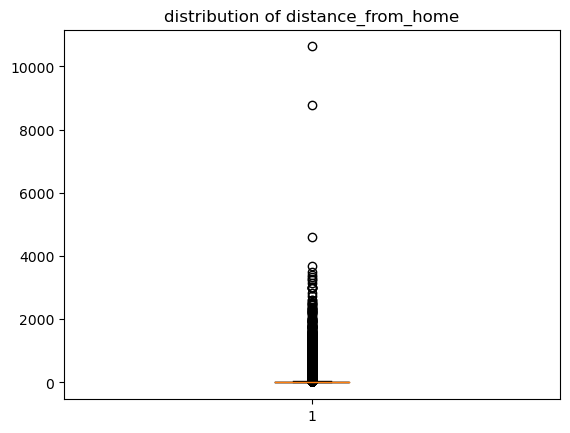

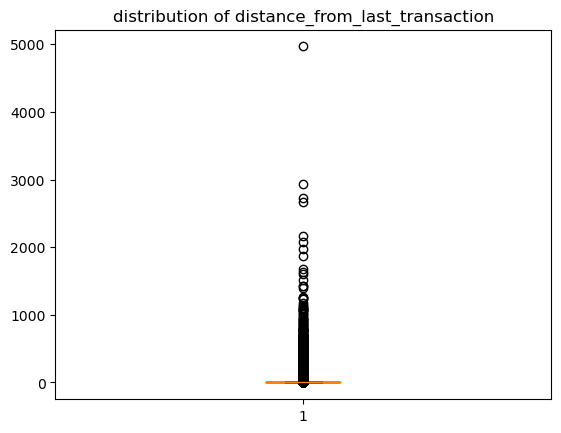

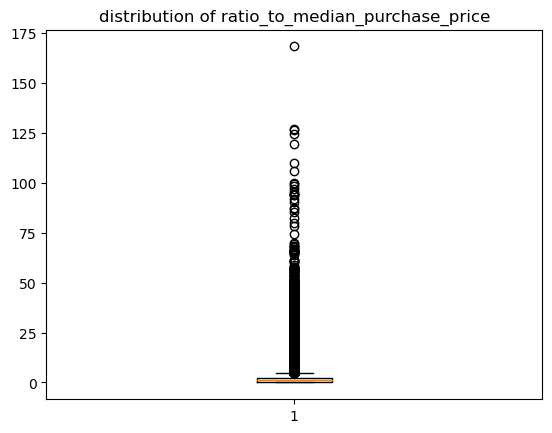

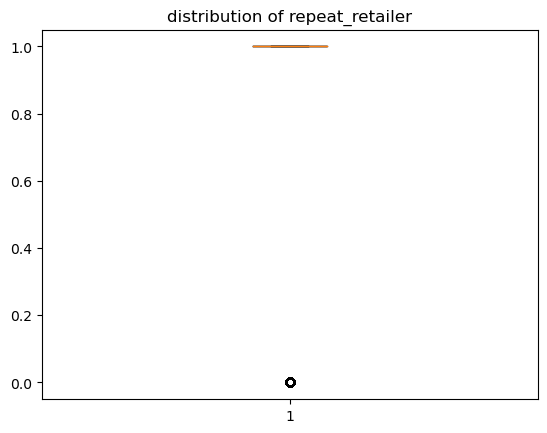

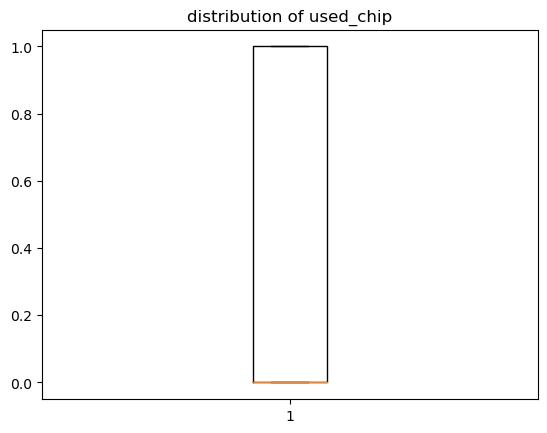

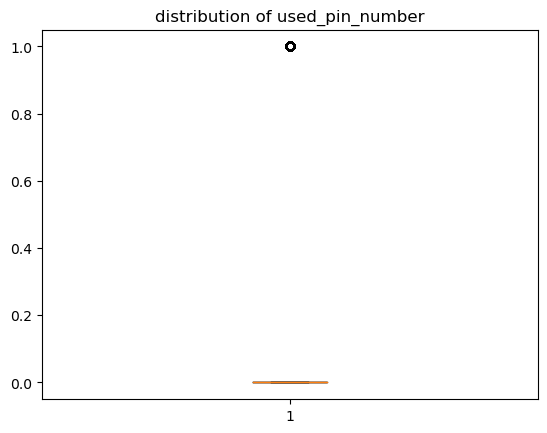

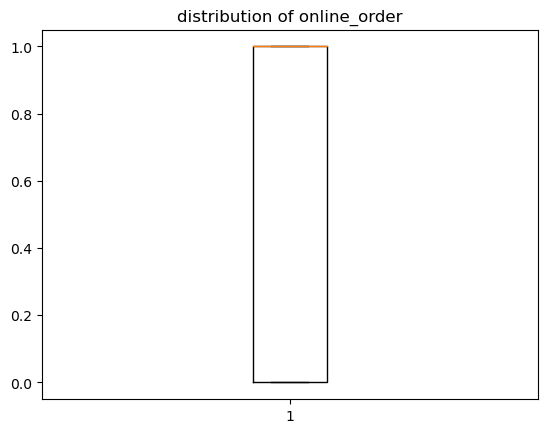

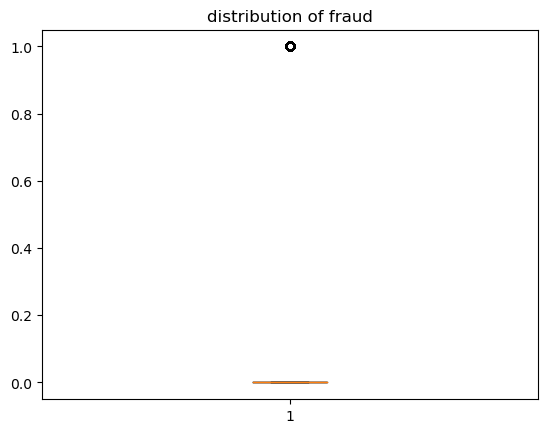

In [13]:
num_cols = list(train.select_dtypes(exclude=object).columns.values)

for col in num_cols:
    
    plt.boxplot(train[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [14]:
train_corr = train.corr()
train_corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.000180,0.000300,0.141424,-0.000952,-0.001607,-0.000301,0.187881
distance_from_last_transaction,-0.000180,1.000000,0.002557,-0.001129,0.001520,-0.000758,0.000405,0.104075
ratio_to_median_purchase_price,0.000300,0.002557,1.000000,0.001817,0.000796,0.001633,-0.002447,0.461966
repeat_retailer,0.141424,-0.001129,0.001817,1.000000,-0.000715,-0.000245,-0.000520,-0.001315
used_chip,-0.000952,0.001520,0.000796,-0.000715,1.000000,-0.001824,-0.000078,-0.061116
used_pin_number,-0.001607,-0.000758,0.001633,-0.000245,-0.001824,1.000000,0.001224,-0.099940
online_order,-0.000301,0.000405,-0.002447,-0.000520,-0.000078,0.001224,1.000000,0.191361
fraud,0.187881,0.104075,0.461966,-0.001315,-0.061116,-0.099940,0.191361,1.000000


<AxesSubplot:>

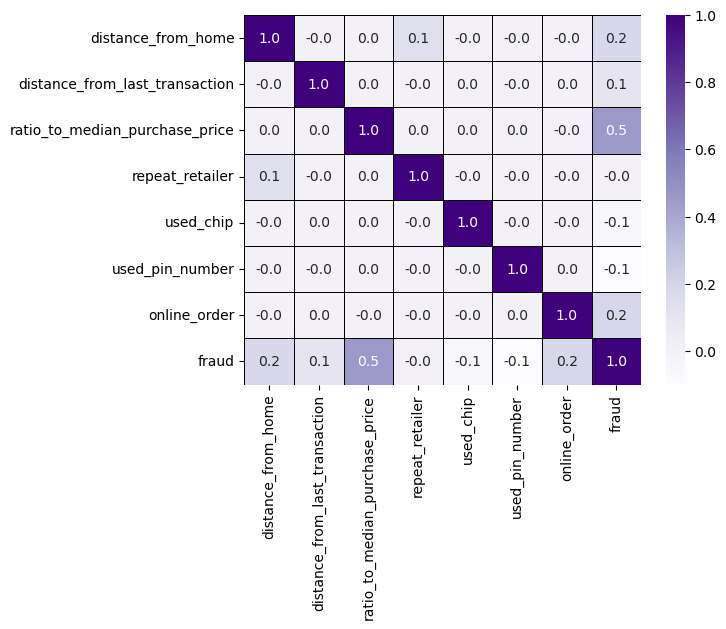

In [15]:
sns.heatmap(train_corr, cmap='Purples', linewidth=0.5, linecolor='black', annot=True, fmt=".1f")

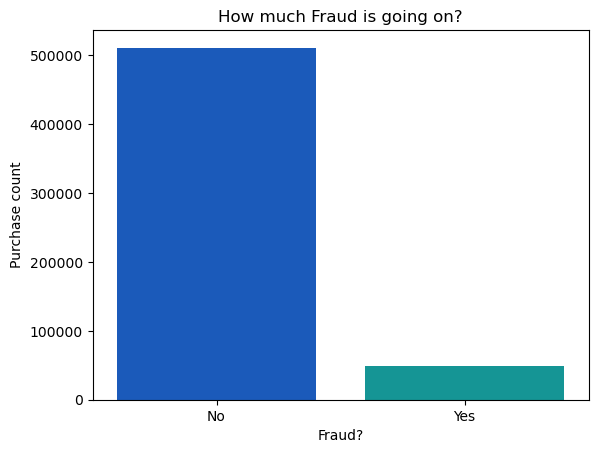

In [16]:
sns.countplot(data = train, x ='fraud', palette='winter')
plt.xlabel('Fraud?')
plt.ylabel('Purchase count')
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.title('How much Fraud is going on?')
plt.show()



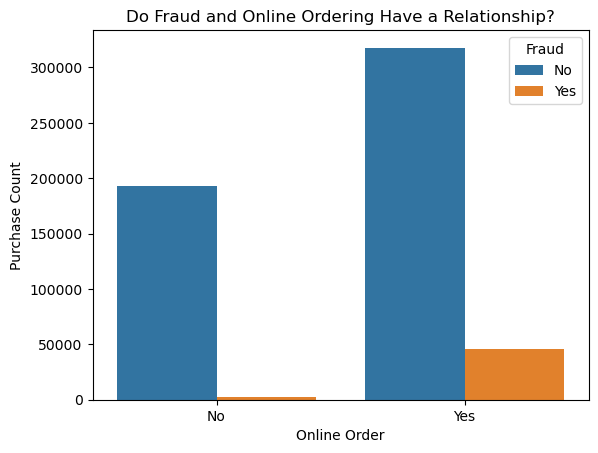

In [17]:
sns.countplot(data = train, x ='online_order', hue='fraud')
plt.xlabel('Online Order')
plt.ylabel('Purchase Count')
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.title('Do Fraud and Online Ordering Have a Relationship?')
mylabels = ['No', 'Yes']
title = 'Fraud'
plt.legend(title=title,labels=mylabels)
plt.show()

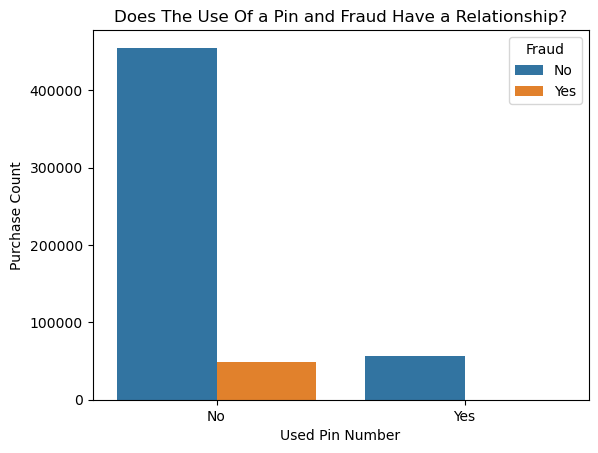

In [18]:
sns.countplot(data = train, x ='used_pin_number', hue='fraud')
plt.xlabel('Used Pin Number')
plt.ylabel('Purchase Count')
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.title('Does The Use Of a Pin and Fraud Have a Relationship?')
title = 'Fraud'
mylabels = ['No', 'Yes']
plt.legend(title=title, labels=mylabels)
plt.show()

<AxesSubplot:xlabel='repeat_retailer', ylabel='count'>

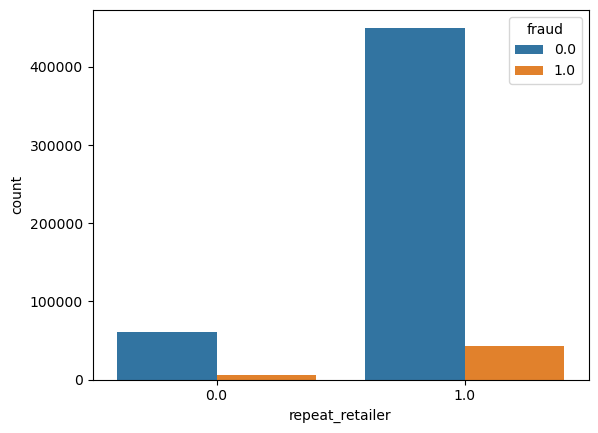

In [19]:
sns.countplot(data = train, x ='repeat_retailer', hue='fraud')

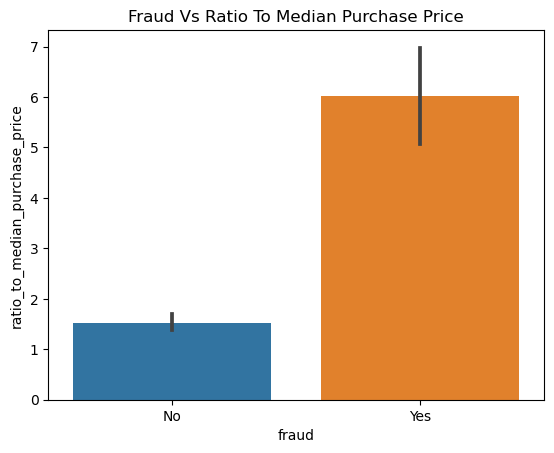

In [20]:
sns.barplot(data=train.sample(1000), x='fraud', y='ratio_to_median_purchase_price')
plt.title('Fraud Vs Ratio To Median Purchase Price')
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.show()

In [22]:
# sns.barplot(data=train, x='distance_from_home', y='repeat_retailer', hue='fraud')
# plt.show()

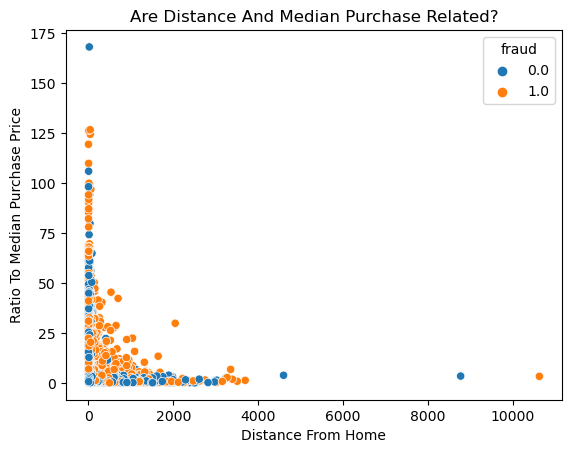

In [23]:
sns.scatterplot(data=train, x=train.distance_from_home, 
                y=train.ratio_to_median_purchase_price, hue='fraud')
plt.xlabel('Distance From Home')
plt.ylabel('Ratio To Median Purchase Price')
plt.title('Are Distance And Median Purchase Related?')
plt.show()

In [ ]:
sns.scatterplot(data=train, x='distance_from_home', y='distance_from_last_transaction', 
            hue='fraud')
plt.title('Are Distances Related?')
title = 'Fraud'
mylabels = ['No', 'Yes']
plt.legend(title=title, labels=mylabels)
plt.show()

In [24]:
from scipy import stats
def question_hypothesis_test4(train):
    
    '''a function which takes in a train data set and calculates and returns a
       pearsons r test for bathrooms and tax value'''
    
    # setting alpha
    a = 0.05
    
    # performing a t test
    corr, p = stats.pearsonr(train.distance_from_last_transaction, train.distance_from_home)
    corr, p

    # if statement to return our results
    if p > a:
        print("We fail to reject null hypothesis")
    else:
        print("We reject the null hypothesis, there is correlation")
        
    print(f"correlation: {corr}")
    print(f"p:           {p}")

In [25]:
question_hypothesis_test4(train)

We fail to reject null hypothesis
correlation: -0.00018008380848594498
p:           0.8927999856024798


In [26]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale, return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns them scaled.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of the original data so no leakage
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    # variable 
    mm_scaler = MinMaxScaler()
    # fit it to scaler
    mm_scaler.fit(train[columns_to_scale])
    # scaling train, validate, test, and columns
    train_scaled[columns_to_scale] = pd.DataFrame(mm_scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(mm_scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(mm_scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return mm_scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled
    



In [27]:
columns_to_scale = ['distance_from_home', 'distance_from_last_transaction', 
                    'ratio_to_median_purchase_price']
train_scaled, validate_scaled, test_scaled,= scale_data(train, 
                                             validate, test, columns_to_scale) 

In [28]:
train_scaled.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
484380,0.007949,0.000091,0.019319,1.0,0.0,1.0,1.0,0.0
612549,0.001712,0.000016,0.016831,1.0,0.0,0.0,0.0,0.0
501559,0.000816,0.000026,0.012236,1.0,0.0,0.0,0.0,0.0
513429,0.000445,0.003176,0.008364,1.0,0.0,0.0,0.0,0.0
318696,0.000544,0.000196,0.003920,1.0,0.0,0.0,0.0,0.0


In [29]:
#train_scaled = X_train_scaled, y_train_scaled
# X_validate_scaled, y_valitate_scaled = validate_scaled
# X_test, y_test = test_scaled

In [30]:
# code to generate baseline 
df['baseline'] = df['fraud'].value_counts().idxmax()
# clean f string
print(f"Baseline: {(df['fraud'] == df['baseline']).mean()*100:.2f}%")

Baseline: 91.26%


In [32]:
rf_train_scores = []
rf_validate_scores = []
for i in range(1,20):
    loop_forest = RandomForestClassifier(max_depth=i, random_state=42, max_samples=0.5)
    loop_forest.fit(X_train, y_train)
    rf_train_scores.append(loop_forest.score(X_train, y_train))
    rf_validate_scores.append(loop_forest.score(X_validate, y_validate))
rf_scores = {'train':rf_train_scores,'validate':rf_validate_scores}
rf_scores = pd.DataFrame(rf_scores)
rf_scores

,train,validate
0,0.912666,0.912050
1,0.916500,0.915800
2,0.973009,0.973383
3,0.991623,0.991712
4,0.999504,0.999463
5,0.999979,0.999946
6,0.999995,0.999962
7,0.999995,0.999962
8,0.999998,0.999967
9,1.000000,0.999975


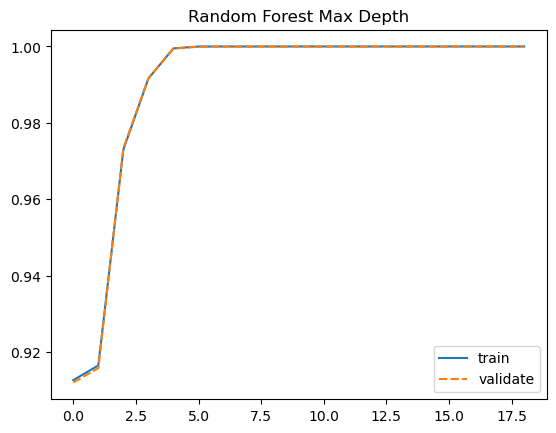

In [33]:
sns.lineplot(data = rf_scores)
plt.title("Random Forest Max Depth")
plt.show()

In [34]:
# random forest algorithm 
rf = RandomForestClassifier(max_depth=5, random_state=42,
                            max_samples=0.5)
#fit it 
rf.fit(X_train, y_train)
# clean f string
print('Random Forest Model')
print(f"Accuracy of Random Forest on train data: {rf.score(X_train, y_train)*100:.2f}%") 
print(f"Accuracy of Random Forest on validate: {rf.score(X_validate, y_validate)*100:.2f}%")

Random Forest Model
Accuracy of Random Forest on train data: 99.95%
Accuracy of Random Forest on validate: 99.95%


In [35]:
solver_list=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [36]:
lr_train_scores = []
lr_validate_scores = []
for i in solver_list:
    logit_loop = LogisticRegression(C=.1, random_state=42, 
                           intercept_scaling=1, solver=i)    
    logit_loop.fit(X_train, y_train)
    lr_train_scores.append(logit_loop.score(X_train, y_train))
    lr_validate_scores.append(logit_loop.score(X_validate, y_validate))
lr_scores = {'train':lr_train_scores,'validate':lr_validate_scores,'solver':solver_list}
lr_scores = pd.DataFrame(lr_scores)
lr_scores

,train,validate,solver
0,0.957298,0.956925,newton-cg
1,0.955879,0.955379,lbfgs
2,0.956882,0.956529,liblinear
3,0.912666,0.912050,sag
4,0.912666,0.912050,saga


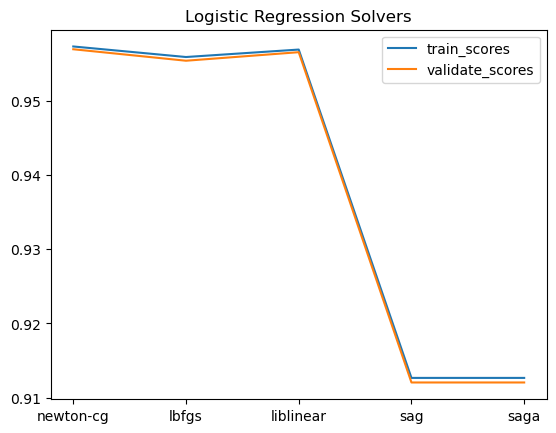

In [37]:
plt.plot(lr_scores['solver'],lr_scores["train"],label='train_scores')
plt.plot(lr_scores['solver'],lr_scores["validate"],label='validate_scores')
plt.legend()
plt.title("Logistic Regression Solvers")
plt.show()

In [38]:
# Logistic Regression algorithm
logit = LogisticRegression(C=.1, random_state=42, 
                           intercept_scaling=1, solver='newton-cg')

#fit the model
logit.fit(X_train, y_train)
#clean f string
print('Logistic Regression Model')
print(f"Accuracy of Logistic Regression on train: {logit.score(X_train, y_train)*100:.2f}%") 
print(f"Accuracy of Logistic Regression on validate: {logit.score(X_validate, y_validate)*100:.2f}%")

Logistic Regression Model
Accuracy of Logistic Regression on train: 95.73%
Accuracy of Logistic Regression on validate: 95.69%


      train  validate
0  1.000000  0.983917
1  0.993805  0.983125
2  0.992636  0.982612
3  0.990770  0.982483
4  0.989450  0.981517
5  0.988616  0.981521
6  0.987430  0.980550
7  0.986870  0.980525
8  0.985602  0.979600
9  0.985407  0.979617


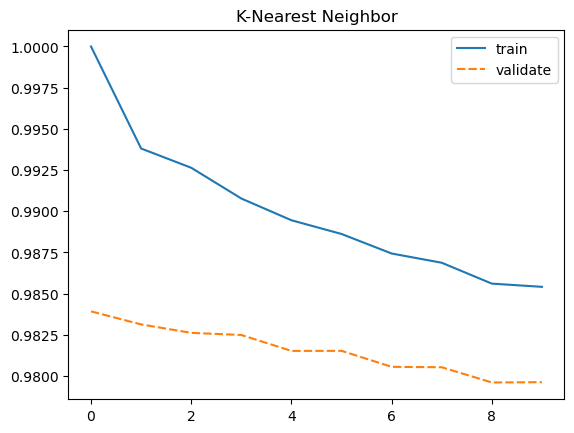

In [39]:
knn_train_scores = []
knn_validate_scores = []
for i in range(1,11):
    knn_loop = KNeighborsClassifier(n_neighbors=i)
    knn_loop.fit(X_train, y_train)
    knn_train_scores.append(knn_loop.score(X_train, y_train))
    knn_validate_scores.append(knn_loop.score(X_validate, y_validate))
knn_scores = {'train':knn_train_scores,'validate':knn_validate_scores}
knn_scores = pd.DataFrame(knn_scores)
print(knn_scores)

sns.lineplot(data=knn_scores)
plt.title("K-Nearest Neighbor")
plt.show()

In [40]:
# K nearest neighbor algorithm

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
knn.score(X_validate, y_validate)
# clean f string
print('KNN Model')
print(f"Accuracy of KNN on train: {knn.score(X_train, y_train)*100:.2f}%") 
print(f"Accuracy of KNN on validate: {knn.score(X_validate, y_validate)*100:.2f}%")

KNN Model
Accuracy of KNN on train: 99.38%
Accuracy of KNN on validate: 98.31%


      train  validate
0  0.939025  0.939450
1  0.966405  0.966612
2  0.979463  0.979292
3  0.992329  0.992275
4  0.998755  0.998717
5  0.999941  0.999929
6  1.000000  0.999971
7  1.000000  0.999971
8  1.000000  0.999971
9  1.000000  0.999971


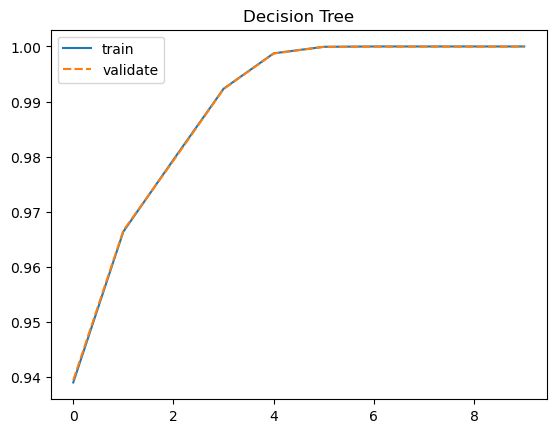

In [41]:
clf_train_scores = []
clf_validate_scores = []
for i in range(1,11):
    clf_loop = DecisionTreeClassifier(max_depth=i)
    clf_loop.fit(X_train, y_train)
    clf_train_scores.append(clf_loop.score(X_train, y_train))
    clf_validate_scores.append(clf_loop.score(X_validate, y_validate))
clf_scores = {'train':clf_train_scores,'validate':clf_validate_scores}
clf_scores = pd.DataFrame(clf_scores)
print(clf_scores)

sns.lineplot(data=clf_scores)
plt.title("Decision Tree")
plt.show()

In [42]:
# Decision Tree neighbor algorithm

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
clf.score(X_validate, y_validate)
# clean f string
print('KNN Model')
print(f"Accuracy of Decision Tree on train: {clf.score(X_train, y_train)*100:.2f}%") 
print(f"Accuracy of Decision Trewe on validate: {clf.score(X_validate, y_validate)*100:.2f}%") 

KNN Model
Accuracy of Decision Tree on train: 99.88%
Accuracy of Decision Trewe on validate: 99.87%


In [43]:
# best algorithm 
test_score = rf.score(X_test, y_test)

# clean f string
print('Random Forest Model')
print(f'Accuracy on Test {test_score*100:.2f}%')

Random Forest Model
Accuracy on Test 99.94%


In [44]:
def separate_column_type_list(df):
    '''
        Creates 2 lists separating continous & discrete
        variables.
        
        Parameters
        ----------
        df : Pandas DataFrame
            The DataFrame from which columns will be sorted.
        
        Returns
        ----------
        continuous_columns : list
            Columns in DataFrame with numerical values.
        discrete_columns : list
            Columns in DataFrame with categorical values.
    '''
    continuous_columns = []
    discrete_columns = []
    
    for column in df.columns:
        if (df[column].dtype == 'int' or df[column].dtype == 'float') and ('id' not in column) and (df[column].nunique()>10):
            continuous_columns.append(column)
        elif(df[column].dtype == 'int' or df[column].dtype == 'float') and (df[column].nunique()>11):
            continuous_columns.append(column)
        else:
            discrete_columns.append(column)
            
    return continuous_columns, discrete_columns

In [45]:
separate_column_type_list(df)


(['distance_from_home',
  'distance_from_last_transaction',
  'ratio_to_median_purchase_price'],
 ['repeat_retailer',
  'used_chip',
  'used_pin_number',
  'online_order',
  'fraud',
  'baseline'])

In [46]:
def get_top_models(X_train, y_train, X_validate, y_validate):
    '''This function gets all the top ML models and plots them together for a visual'''
    # Best Random Forest
    best_rf = RandomForestClassifier(max_depth=5, random_state=42, max_samples=0.5)
    best_rf.fit(X_train, y_train)

    best_rf_train_score = best_rf.score(X_train, y_train)
    best_rf_validate_score = best_rf.score(X_validate, y_validate)
    
    # Best KNN
    best_knn = KNeighborsClassifier(n_neighbors=2)
    best_knn.fit(X_train, y_train)

    best_knn_train_score = best_knn.score(X_train, y_train)
    best_knn_validate = best_knn.score(X_validate, y_validate)
    
    # Best Model: Logistic Regression
    best_lr = LogisticRegression(C=.1, random_state=42,intercept_scaling=1, solver='newton-cg')
    best_lr.fit(X_train, y_train)

    best_lr_train_score = best_lr.score(X_train, y_train)
    best_lr_validate_score = best_lr.score(X_validate, y_validate)
    
    # Best Model: Combo - Logistic Regression
    best_clf = DecisionTreeClassifier(max_depth=5)   
    best_clf.fit(X_train, y_train)

    best_clf_train_score = best_clf.score(X_train, y_train)
    best_clf_validate_score = best_clf.score(X_validate, y_validate)
    
    # lists with model names & score information
    best_model_name_list = ["KNN","Random_Forest","Logistic_Regression","Decision Tree"]
    best_model_train_scores_list = [best_knn_train_score,best_rf_train_score,best_lr_train_score,best_clf_train_score]
    best_model_validate_scores_list = [best_knn_validate,best_rf_validate_score,best_lr_validate_score,best_clf_validate_score]
    
    # new empty DataFrame
    best_scores_df = pd.DataFrame()
    
    # new columns using lists for data
    best_scores_df["Model"] = best_model_name_list
    best_scores_df["Train_Score"] = best_model_train_scores_list
    best_scores_df["Validate_Score"] = best_model_validate_scores_list
    
    melted_scores_df = pd.DataFrame()
    
    train_max = melted_scores_df[melted_scores_df["Type"]=="Train"]["Score"].max()
    validate_max = melted_scores_df[melted_scores_df["Type"]=="Validate"]["Score"].max()
    
    plt.figure(figsize=(11, 8.5))

    # barplot
    top_model_scores_barplot = sns.barplot(data=melted_scores_df,x="Model",y="Score",hue="Type",palette="husl")

    # extras
    # ======
    # horizontal line
    plt.axhline(y = validate_max, color = 'purple', linestyle = '--')

    # formatting horizontal line text
    top_model_scores_barplot.text(2.63,.51, "53.2%",fontdict=dict(fontsize=15,color="white",weight="bold"))

    # moving legend
    sns.move_legend(top_model_scores_barplot, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title="Test Type", frameon=False)

    # formatting legend
    plt.setp(top_model_scores_barplot.get_legend().get_texts(), fontsize='15')
    plt.setp(top_model_scores_barplot.get_legend().get_title(), fontsize='20')
    #plt.legend(fontsize='x-large', title_fontsize='40')
    plt.show()


In [47]:
# best Random Forest
best_rf = RandomForestClassifier(max_depth=5, random_state=42, max_samples=0.5)
best_rf.fit(X_train, y_train)

best_rf_train_score = best_rf.score(X_train, y_train)
best_rf_validate_score = best_rf.score(X_validate, y_validate)
    
# Best KNN
best_knn = KNeighborsClassifier(n_neighbors=2)
best_knn.fit(X_train, y_train)

best_knn_train_score = best_knn.score(X_train, y_train)
best_knn_validate = best_knn.score(X_validate, y_validate)
    
# Best Logistic Regression
best_lr = LogisticRegression(C=.1, random_state=42,intercept_scaling=1, solver='newton-cg')
best_lr.fit(X_train, y_train)

best_lr_train_score = best_lr.score(X_train, y_train)
best_lr_validate_score = best_lr.score(X_validate, y_validate)
    
# Best Decision Tree
best_clf = DecisionTreeClassifier(max_depth=5)   
best_clf.fit(X_train, y_train)

best_clf_train_score = best_clf.score(X_train, y_train)
best_clf_validate_score = best_clf.score(X_validate, y_validate)

In [48]:
# lists with model names & score information
best_model_name_list = ["KNN","Random_Forest","Logistic_Regression","Decision Tree"]
best_model_train_scores_list = [best_knn_train_score,best_rf_train_score,best_lr_train_score,best_clf_train_score]
best_model_validate_scores_list = [best_knn_validate,best_rf_validate_score,best_lr_validate_score,best_clf_validate_score]
    
# new empty DataFrame
best_scores_df = pd.DataFrame()

In [49]:
# new columns using lists for data
best_scores_df["Model"] = best_model_name_list
best_scores_df["Train_Score"] = best_model_train_scores_list
best_scores_df["Validate_Score"] = best_model_validate_scores_list

In [50]:
best_scores_df

,Model,Train_Score,Validate_Score
0,KNN,0.993805,0.983125
1,Random_Forest,0.999504,0.999463
2,Logistic_Regression,0.957298,0.956925
3,Decision Tree,0.998755,0.998713


<Figure size 1100x850 with 0 Axes>

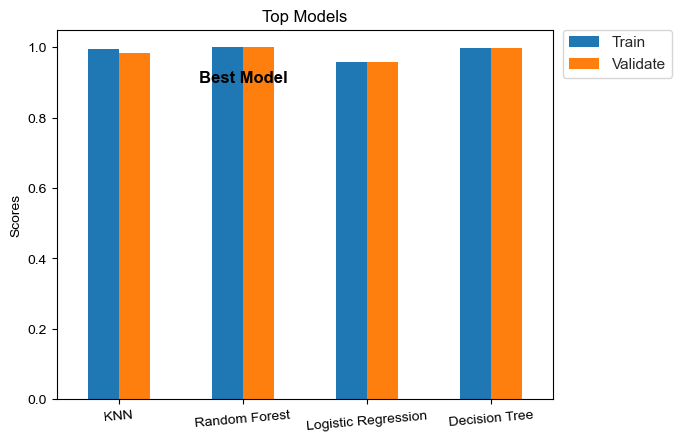

In [51]:
plt.figure(figsize=(11, 8.5))
ax = best_scores_df.plot.bar(rot=5)
plt.xticks(np.arange(4), ['KNN', 'Random Forest','Logistic Regression', 'Decision Tree'])
plt.ylabel('Scores')
plt.title('Top Models')
sns.set_theme(style="whitegrid")
ax.annotate('Best Model',fontsize=12,color="Black",weight="bold", xy=(1, 1), 
            xytext=(.65, .9))
mylabels = ['Train', 'Validate']
ax.legend(labels=mylabels,bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0)
plt.show()

In [52]:
def get_top_models(X_train, y_train, X_validate, y_validate):
    '''This function gets all the top ML models and plots them together for a visual'''

    # best Random Forest
    best_rf = RandomForestClassifier(max_depth=5, random_state=42, max_samples=0.5)
    best_rf.fit(X_train, y_train)

    best_rf_train_score = best_rf.score(X_train, y_train)
    best_rf_validate_score = best_rf.score(X_validate, y_validate)

    # Best KNN
    best_knn = KNeighborsClassifier(n_neighbors=2)
    best_knn.fit(X_train, y_train)

    best_knn_train_score = best_knn.score(X_train, y_train)
    best_knn_validate = best_knn.score(X_validate, y_validate)

    # Best Logistic Regression
    best_lr = LogisticRegression(C=.1, random_state=42,intercept_scaling=1, solver='newton-cg')
    best_lr.fit(X_train, y_train)

    best_lr_train_score = best_lr.score(X_train, y_train)
    best_lr_validate_score = best_lr.score(X_validate, y_validate)

    # Best Decision Tree
    best_clf = DecisionTreeClassifier(max_depth=5)   
    best_clf.fit(X_train, y_train)

    best_clf_train_score = best_clf.score(X_train, y_train)
    best_clf_validate_score = best_clf.score(X_validate, y_validate)

    # lists with model names & score information
    best_model_name_list = ["KNN","Random_Forest","Logistic_Regression","Decision Tree"]
    best_model_train_scores_list = [best_knn_train_score,best_rf_train_score,best_lr_train_score,best_clf_train_score]
    best_model_validate_scores_list = [best_knn_validate,best_rf_validate_score,best_lr_validate_score,best_clf_validate_score]
    
    # new empty DataFrame
    best_scores_df = pd.DataFrame()

    # new columns using lists for data
    best_scores_df["Model"] = best_model_name_list
    best_scores_df["Train_Score"] = best_model_train_scores_list
    best_scores_df["Validate_Score"] = best_model_validate_scores_list

    # plot it
    plt.figure(figsize=(11, 8.5))
    best_scores_df.plot.bar(rot=5)
    plt.ylabel('Scores')
    plt.xticks(np.arange(4), ['KNN', 'Random Forest','Logistic Regression', 'Decision Tree'])
    plt.title('Top Models')
    
    plt.show()

<Figure size 1100x850 with 0 Axes>

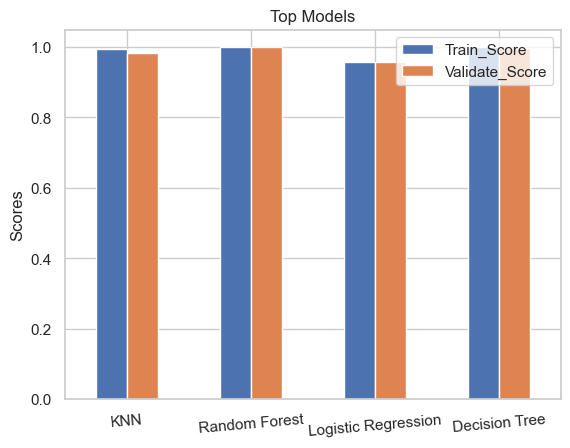

In [53]:
get_top_models(X_train, y_train, X_validate, y_validate)

In [54]:
model_accuracy = (df.prediction == df.actual).mean()
baseline_accuracy = (df.baseline_prediction == df.actual).mean()

print(f'   model accuracy: {model_accuracy:.2%}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')


AttributeError: 'DataFrame' object has no attribute 'prediction'

In [55]:
subset = df[df.actual == 'fraud']

model_recall = (subset.prediction == subset.actual).mean()
baseline_recall = (subset.baseline_prediction == subset.actual).mean()

print(f'   model recall: {model_recall:.2%}')
print(f'baseline recall: {baseline_recall:.2%}')


AttributeError: 'DataFrame' object has no attribute 'actual'

In [56]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    218892
         1.0       0.99      1.00      0.99     21108

    accuracy                           1.00    240000
   macro avg       0.99      1.00      1.00    240000
weighted avg       1.00      1.00      1.00    240000



In [57]:
y_pred = knn.predict(X_train)

In [58]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.99


In [59]:
y_pred_proba = knn.predict_proba(X_train)

In [60]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    511093
         1.0       1.00      0.93      0.96     48907

    accuracy                           0.99    560000
   macro avg       1.00      0.96      0.98    560000
weighted avg       0.99      0.99      0.99    560000



In [67]:
cr = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
cr

,precision,recall,f1-score,support
0.0,0.993258,1.000000,0.996618,511093.000000
1.0,1.000000,0.929069,0.963231,48907.000000
accuracy,0.993805,0.993805,0.993805,0.993805
macro avg,0.996629,0.964535,0.979924,560000.000000
weighted avg,0.993847,0.993805,0.993702,560000.000000


In [72]:
cr.drop(columns='support', inplace=True)

<Figure size 1100x850 with 0 Axes>

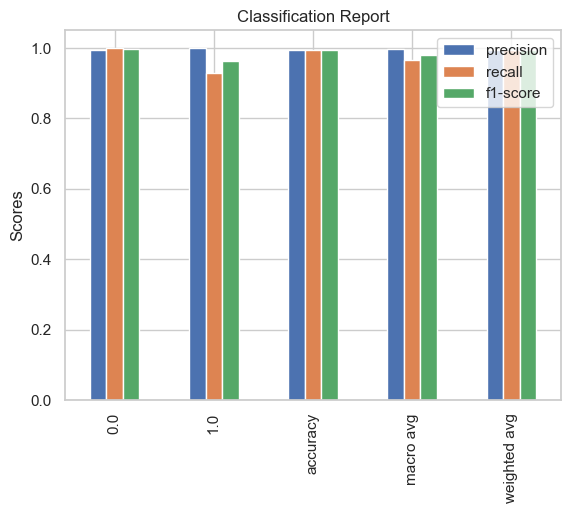

In [73]:
plt.figure(figsize=(11, 8.5))
cr.plot.bar()
plt.ylabel('Scores')
plt.title('Classification Report')
    
plt.show()

In [75]:
def get_cr(X_train, y_train):
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)
    cr = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    #plot it
    plt.figure(figsize=(11, 8.5))
    cr.plot.bar()
    plt.ylabel('Scores')
    plt.title('Classification Report')

    plt.show()

<Figure size 1100x850 with 0 Axes>

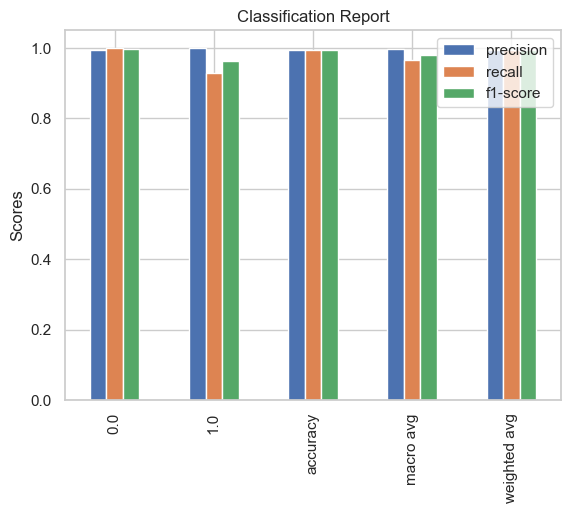

In [76]:
get_cr(X_train, y_train)